In [16]:
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt

# Input

In [15]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [8]:
turbines = pd.read_csv("../build/turbines-DE.csv", index_col=0)
turbines 

,x_m,y_m,lcoe_eur_per_mwh,disamenity_cost_eur_per_turbine
0,4249600,3533599,20.569986,21.648275
1,4251500,3533599,20.666000,25.402365
2,4252425,3533200,20.574173,24.580761
3,4253425,3533299,20.640062,21.477843
4,4213000,3533099,18.386633,63.076881
...,...,...,...,...
25328,4343150,2697800,255.619873,743.324903
25329,4337900,2697099,85.802971,249.355203
25330,4342500,2697025,274.985718,669.046017
25331,4337100,2696475,119.502106,343.923431


# LCOE back of the envelope

In [20]:
afc = -numpy_financial.pmt(params['wacc'], params['lifetime'], params['invest'])

In [23]:
lcoe = (afc + params['cost_qfix']) / 2200
lcoe

41.49837919283222

# Plot

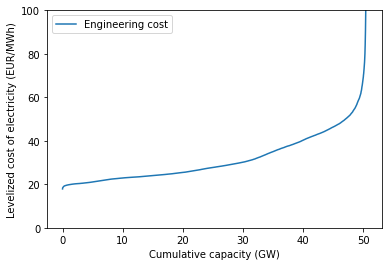

In [30]:
plt.figure()

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

engineering_cost = turbines['lcoe_eur_per_mwh'].sort_values()
plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.ylim([0,100])

plt.legend()

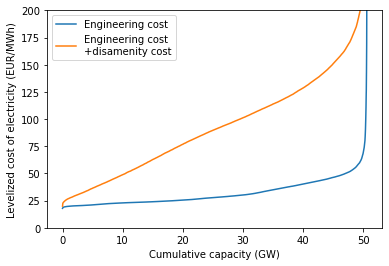

In [34]:
plt.figure()

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

engineering_cost = turbines['lcoe_eur_per_mwh'].sort_values()
plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')

disamenity_cost = (turbines['lcoe_eur_per_mwh'] + turbines['disamenity_cost_eur_per_turbine']).sort_values()
plt.plot(cumulative_capacity, disamenity_cost, label='Engineering cost\n+disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.ylim([0,200])

plt.legend()

In [ ]:
lcoe 